# EDA Project

In [118]:
# Exploratory Data Analysis
# Having an introduction of data
# Getting familiar with the data
# try to get to know more about the data 
# looking at the data from different angles and prespectives

## EDA Steps

In [119]:
# Size of the data 
# Attributes in a data
# Remove the irrelevant columns 
# Proper type representation (perform typecasting if required)
# Check for missing values
# Handling the missing values (if present)
# Check for outliers (extreme values)
# Handling the outliers
# Encoding
# Check for duplicate values (rows)
# Remove the duplicate rows
# Check the coorelation

# Importing Libraries

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Importing the Data

In [121]:
path = r"C:\Users\sjasm\OneDrive\Desktop\code\loan_data.csv"

In [122]:
df=pd.read_csv(path)

In [123]:
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


# Shape of the data

In [124]:
df.shape

(2200, 15)

In [125]:
# There are 2200 rows and 15 columns in the data 

# Attributes present in the data

In [126]:
df.columns

Index(['ID', 'Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

# Exclude the Irrelevant columns

In [127]:
# ID, state are irrelevant columns so we will drop them.

In [128]:
df.drop(columns=['ID','State'],inplace=True)

In [129]:
df.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'Home.Ownership',
       'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [130]:
# Replace . with _ in the column names

In [131]:
# df.columns.replace('.','_')

In [132]:
df.columns=df.columns.str.replace('.','_')

In [133]:
df.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,19750,19750,17.27%,60 months,debt_consolidation,13.39%,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,2100,2100,14.33%,36 months,major_purchase,3.50%,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,28000,28000,16.29%,36 months,credit_card,19.62%,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,24250,17431.82,12.23%,60 months,credit_card,23.79%,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


# Type Checking

df.dtypes

In [134]:
# Columns except "Loan.Purpose" and "Home.Ownership" should all be int

## Amount.Requested

In [135]:
# df.Amount_Requested.astype(float)

In [136]:
df.loc[df.Amount_Requested == ".","Amount_Requested"]=np.nan

In [137]:
df.Amount_Requested.dtype

dtype('O')

In [138]:
df.Amount_Requested=df.Amount_Requested.astype(float)

In [139]:
df.Amount_Requested.dtype

dtype('float64')

## Amount_Funded_By_Investors

In [140]:
df.Amount_Funded_By_Investors=pd.to_numeric(df.Amount_Funded_By_Investors, errors="coerce")

In [141]:
df.Amount_Funded_By_Investors.dtype

dtype('float64')

## Interest_Rate

In [142]:
df.Interest_Rate=df.Interest_Rate.str.strip("%").astype(float)

In [143]:
df.Interest_Rate

0       18.49
1       17.27
2       14.33
3       16.29
4       12.23
        ...  
2195    23.28
2196    14.33
2197    15.31
2198    20.99
2199    10.16
Name: Interest_Rate, Length: 2200, dtype: float64

## Loan_Length

In [144]:
df.Loan_Length

0       60 months
1       60 months
2       36 months
3       36 months
4       60 months
          ...    
2195    60 months
2196    60 months
2197    60 months
2198    60 months
2199    36 months
Name: Loan_Length, Length: 2200, dtype: object

In [145]:
df.Loan_Length=pd.to_numeric(df.Loan_Length.replace(r'[^0-9]','',regex=True),errors="coerce")

In [146]:
df.Loan_Length

0       60.0
1       60.0
2       36.0
3       36.0
4       60.0
        ... 
2195    60.0
2196    60.0
2197    60.0
2198    60.0
2199    36.0
Name: Loan_Length, Length: 2200, dtype: float64

## Debt_To_Income_Ratio

In [147]:
df.Debt_To_Income_Ratio

0       27.56%
1       13.39%
2        3.50%
3       19.62%
4       23.79%
         ...  
2195    12.10%
2196    14.16%
2197    15.03%
2198    11.63%
2199     3.83%
Name: Debt_To_Income_Ratio, Length: 2200, dtype: object

In [148]:
df.Debt_To_Income_Ratio=df.Debt_To_Income_Ratio.str.strip("%").astype(float)

In [149]:
df.Debt_To_Income_Ratio

0       27.56
1       13.39
2        3.50
3       19.62
4       23.79
        ...  
2195    12.10
2196    14.16
2197    15.03
2198    11.63
2199     3.83
Name: Debt_To_Income_Ratio, Length: 2200, dtype: float64

## FICO_Range

In [150]:
df.FICO_Range

0       720-724
1       710-714
2       690-694
3       710-714
4       730-734
         ...   
2195    675-679
2196    700-704
2197    675-679
2198    670-674
2199    710-714
Name: FICO_Range, Length: 2200, dtype: object

In [151]:
def interval(x):
    lst=x.split("-")
    new = float((int(lst[0])+int(lst[1]))/2)
    return new

In [152]:
df.FICO_Range=df.FICO_Range.apply(interval)

In [153]:
df.dtypes

Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                  object
Revolving_CREDIT_Balance           object
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

## Open_CREDIT_Lines

In [154]:
df.Open_CREDIT_Lines

0       11
1       14
2       13
3       12
4        6
        ..
2195    16
2196     4
2197    10
2198     5
2199    10
Name: Open_CREDIT_Lines, Length: 2200, dtype: object

In [155]:
df.Open_CREDIT_Lines=pd.to_numeric(df.Open_CREDIT_Lines, errors="coerce")

In [156]:
df.Open_CREDIT_Lines.dtype

dtype('float64')

## Revolving_CREDIT_Balance

In [157]:
df.Revolving_CREDIT_Balance

0       15210
1       19070
2         893
3       38194
4       31061
        ...  
2195    17969
2196     5718
2197    46879
2198    32394
2199    10204
Name: Revolving_CREDIT_Balance, Length: 2200, dtype: object

In [158]:
df.Revolving_CREDIT_Balance=pd.to_numeric(df.Revolving_CREDIT_Balance,errors="coerce")

In [159]:
df.Revolving_CREDIT_Balance.dtype

dtype('float64')

## Employment_Length

In [160]:
df.Employment_Length.value_counts()

Employment_Length
10+ years    575
< 1 year     229
2 years      217
3 years      203
5 years      181
4 years      162
1 year       159
6 years      134
7 years      109
8 years       95
9 years       66
.              1
Name: count, dtype: int64

In [161]:
#10+ years -> 11
#< 1 years -> .5
#. -> nan

In [162]:
df.Employment_Length=pd.to_numeric(df.Employment_Length.replace({"10+ years":"11","< 1 year":".5"}).replace("[^0-9.]",'',regex=True), errors="coerce")

In [163]:
df.dtypes

Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                        float64
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                 float64
dtype: object

## Checking the Missing values

In [164]:
df.isna().sum()

Amount_Requested                   5
Amount_Funded_By_Investors         4
Interest_Rate                      0
Loan_Length                        2
Loan_Purpose                       1
Debt_To_Income_Ratio               1
Home_Ownership                     1
Monthly_Income                     3
FICO_Range                         0
Open_CREDIT_Lines                  7
Revolving_CREDIT_Balance           5
Inquiries_in_the_Last_6_Months     3
Employment_Length                 70
dtype: int64

In [165]:
df.shape

(2200, 13)

In [166]:
# df.dropna()

In [167]:
# Approach - 1
# Segregate the categorical and numerical continuous columns
# Fill the numerical continuous with mean and categorical with mode

In [168]:
# Approach - 2

In [169]:
# Foward and Backward filling

## Segregation of numerical continuous and categorical columns

In [170]:
# If the dtype is numeric and the unique values are more than 12 then its a numerical continuous column else categorical column

In [171]:
num_col=[]
cate_col=[]
for i in df.columns:
    if df[i].dtypes != object and df[i].nunique()>12:
        num_col.append(i)
    else:
        cate_col.append(i)

In [172]:
num_col

['Amount_Requested',
 'Amount_Funded_By_Investors',
 'Interest_Rate',
 'Debt_To_Income_Ratio',
 'Monthly_Income',
 'FICO_Range',
 'Open_CREDIT_Lines',
 'Revolving_CREDIT_Balance']

In [173]:
cate_col

['Loan_Length',
 'Loan_Purpose',
 'Home_Ownership',
 'Inquiries_in_the_Last_6_Months',
 'Employment_Length']

In [174]:
def fillmean(i):
    df[i].fillna(df[i].mean(),inplace=True)

In [175]:
def fillmode(i):
    df[i].fillna(df[i].mode().iloc[0],inplace=True)

In [176]:
for i in num_col:
    fillmean(i)

In [177]:
for i in cate_col:
    fillmode(i)

In [178]:
df.isna().sum()

Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              0
Home_Ownership                    0
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
dtype: int64

## Check for Outliers

In [179]:
# Boxplot (Inter-Quartile Range Method) 
# Scatterplot Visualisation
# For outliers we only check in the numerical continuous columns

In [180]:
num_col,len(num_col)

(['Amount_Requested',
  'Amount_Funded_By_Investors',
  'Interest_Rate',
  'Debt_To_Income_Ratio',
  'Monthly_Income',
  'FICO_Range',
  'Open_CREDIT_Lines',
  'Revolving_CREDIT_Balance'],
 8)

In [181]:
# sns.set_theme(style=,palette=,font=,font_scale=)
# This line is from seaborn, A python library used to make beautiful graphs easily. It sets the default appearance(Theme) for all seaborn plots

In [182]:
sns.set_theme(style="whitegrid",palette="bright",font_scale=1)

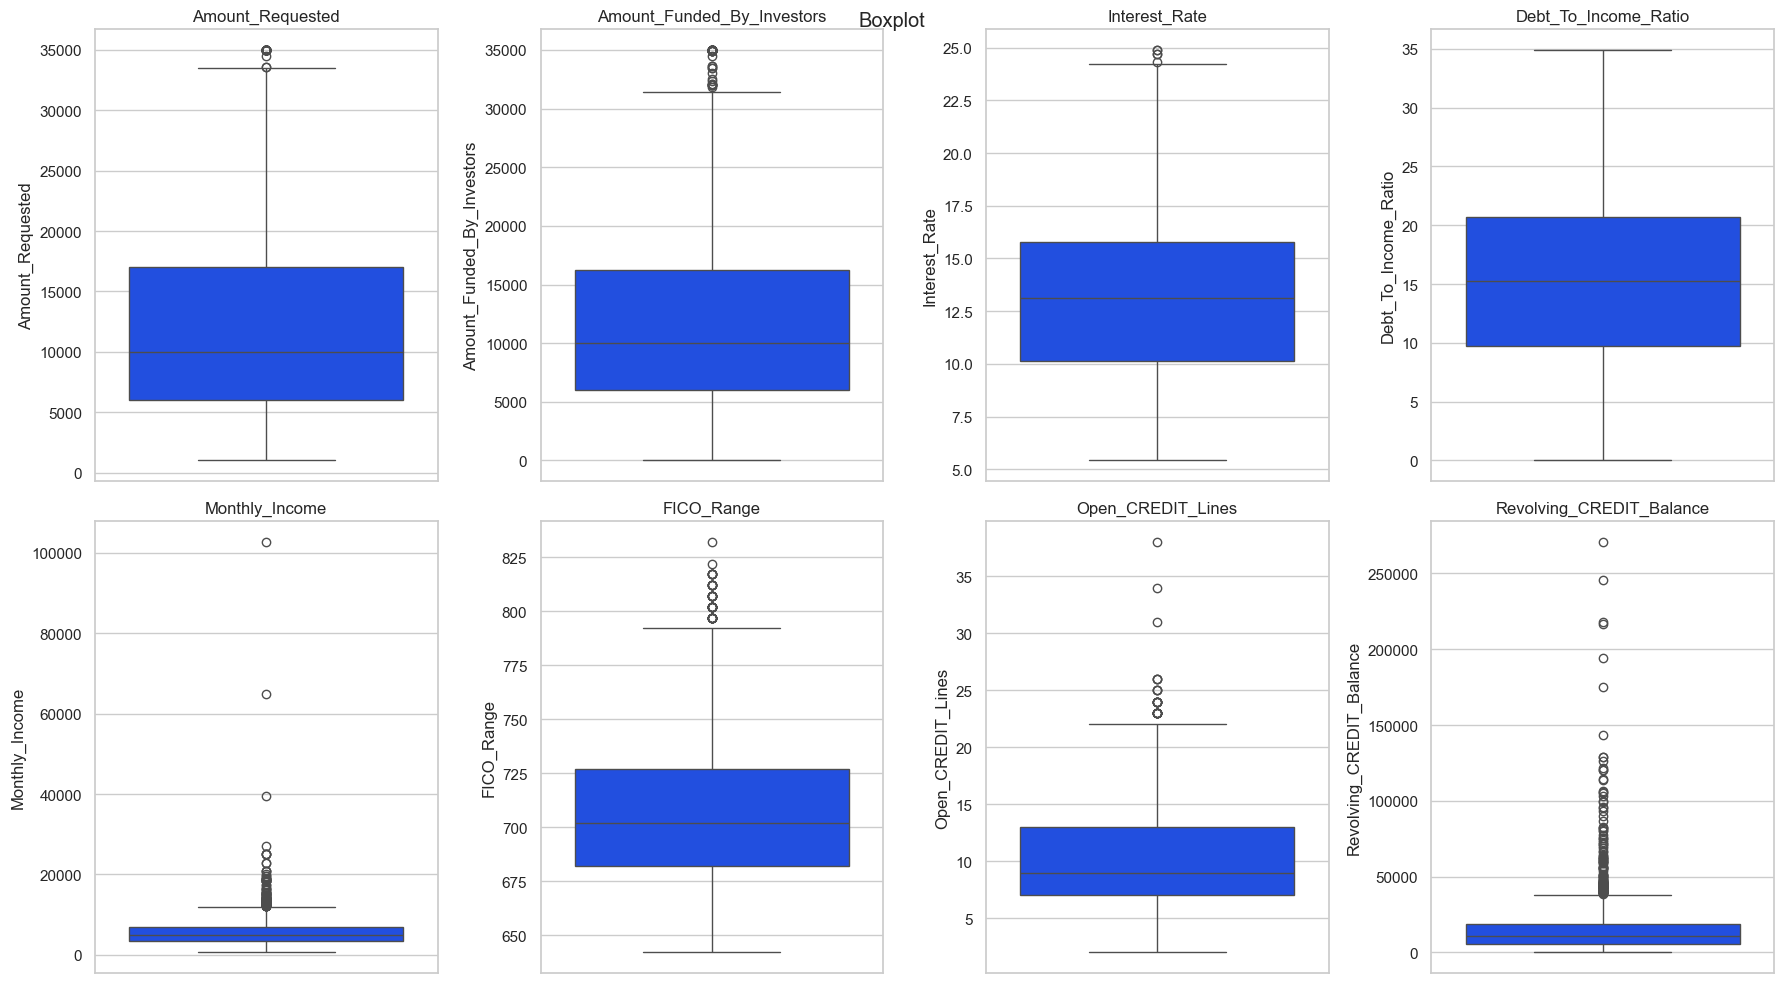

In [183]:
f,a=plt.subplots(2,4, figsize=(18,10),dpi=100)
ind=0
for i in range(2):
    for j in range(4):
        sns.boxplot(y=num_col[ind], data=df, ax=a[i][j])
        a[i][j].set_title(num_col[ind])
        ind+=1
plt.tight_layout()
f=f.suptitle("Boxplot")
plt.show()

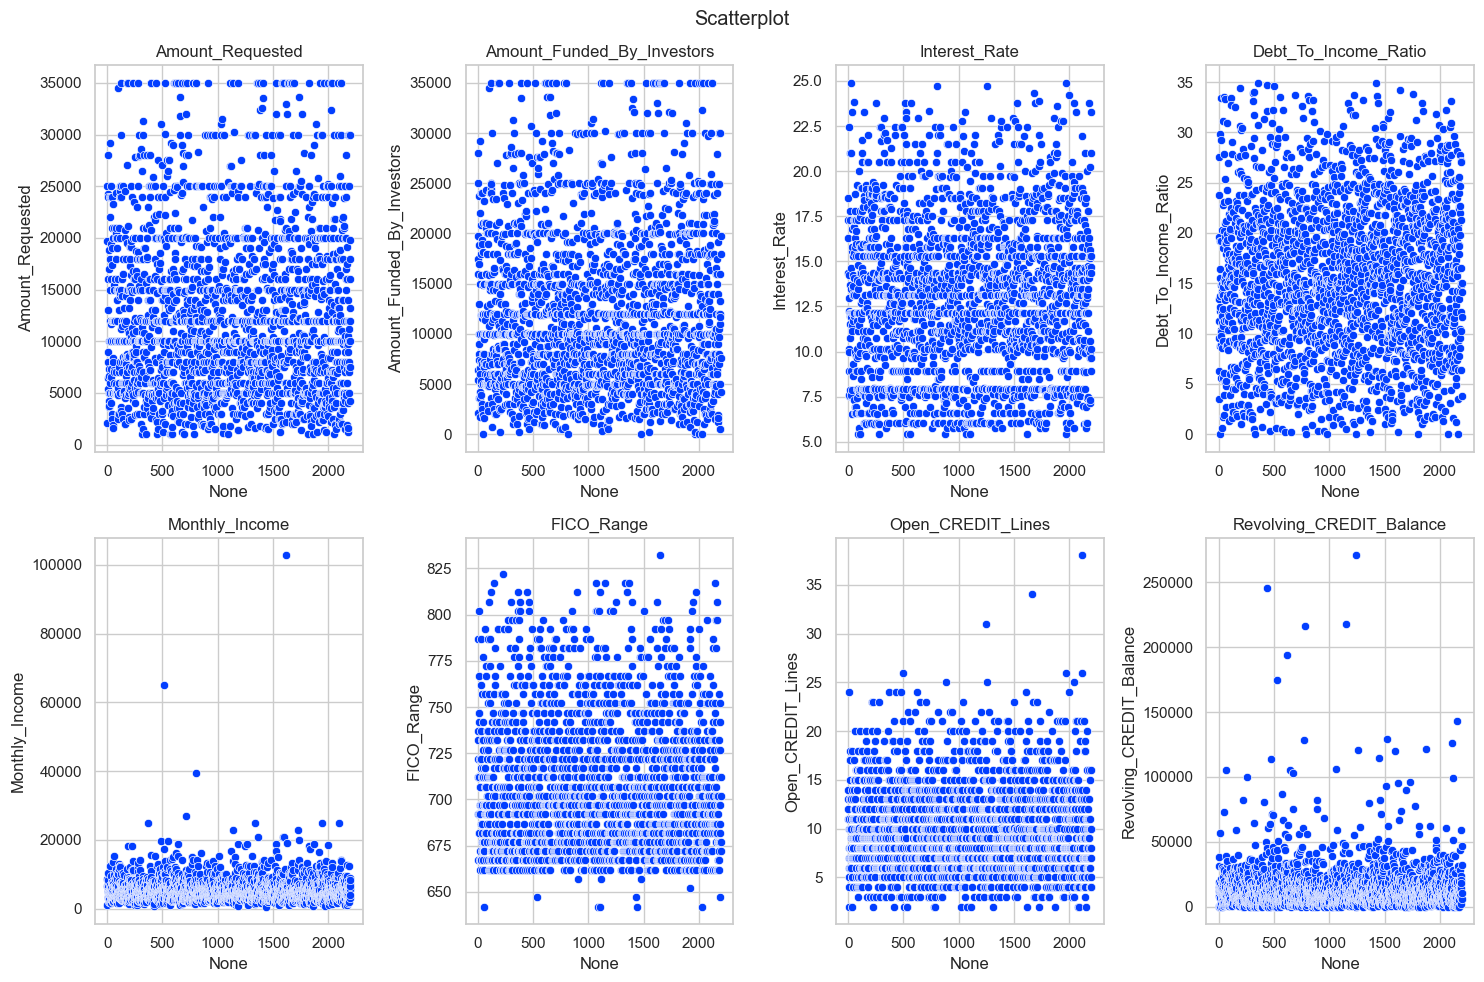

In [184]:
f,a=plt.subplots(2,4,figsize=(15,10),dpi=100)
f=f.suptitle("Scatterplot")
ind=0
for i in range(2):
    for j in range(4):
        sns.scatterplot(y=df[num_col[ind]], x=df[num_col[ind]].index, ax=a[i][j])
        a[i][j].set_title(num_col[ind])
        ind+=1
plt.tight_layout()
plt.show()

## Handling the outliers

In [185]:
# To handle the outliers we can cap the values to 2 values, higher and lower
# We can use the inter quartile method to find the lower and higher values
# we can decide based on the scatter plot
# We can use the blanket capping to cap the values between 1st and 99th percentile value

### Inter-Quartile Range method

In [186]:
# Upper = Q3+1.5*IQR
# Lower = Q1-1.5*IQR
# IQR = Q3-Q1
# Q3 = 75th percentile value
# Q1 = 25th percentile value

In [187]:
num_col

['Amount_Requested',
 'Amount_Funded_By_Investors',
 'Interest_Rate',
 'Debt_To_Income_Ratio',
 'Monthly_Income',
 'FICO_Range',
 'Open_CREDIT_Lines',
 'Revolving_CREDIT_Balance']

In [188]:
q3,q1=df.Amount_Requested.quantile([.75,.25])

In [189]:
IQR = q3-q1
upper = q3+1.5*IQR
lower = q1-1.5*IQR
print("Q1 :",q1)
print("Q3 :",q3)
print("IQR :",IQR)
print("Upper cap :", upper)
print("Lower cap :", lower)

Q1 : 6000.0
Q3 : 17000.0
IQR : 11000.0
Upper cap : 33500.0
Lower cap : -10500.0


In [190]:
for i in num_col:
    print(i)

Amount_Requested
Amount_Funded_By_Investors
Interest_Rate
Debt_To_Income_Ratio
Monthly_Income
FICO_Range
Open_CREDIT_Lines
Revolving_CREDIT_Balance


In [191]:
def quant(col):
    q3,q1=df[col].quantile([.75,.25])
    IQR = q3-q1
    upper = q3+1.5*IQR
    lower = q1-1.5*IQR
    df[col]=df[col].clip(lower,upper)

In [192]:
for i in num_col:
    quant(i)

In [193]:
len(num_col)

8

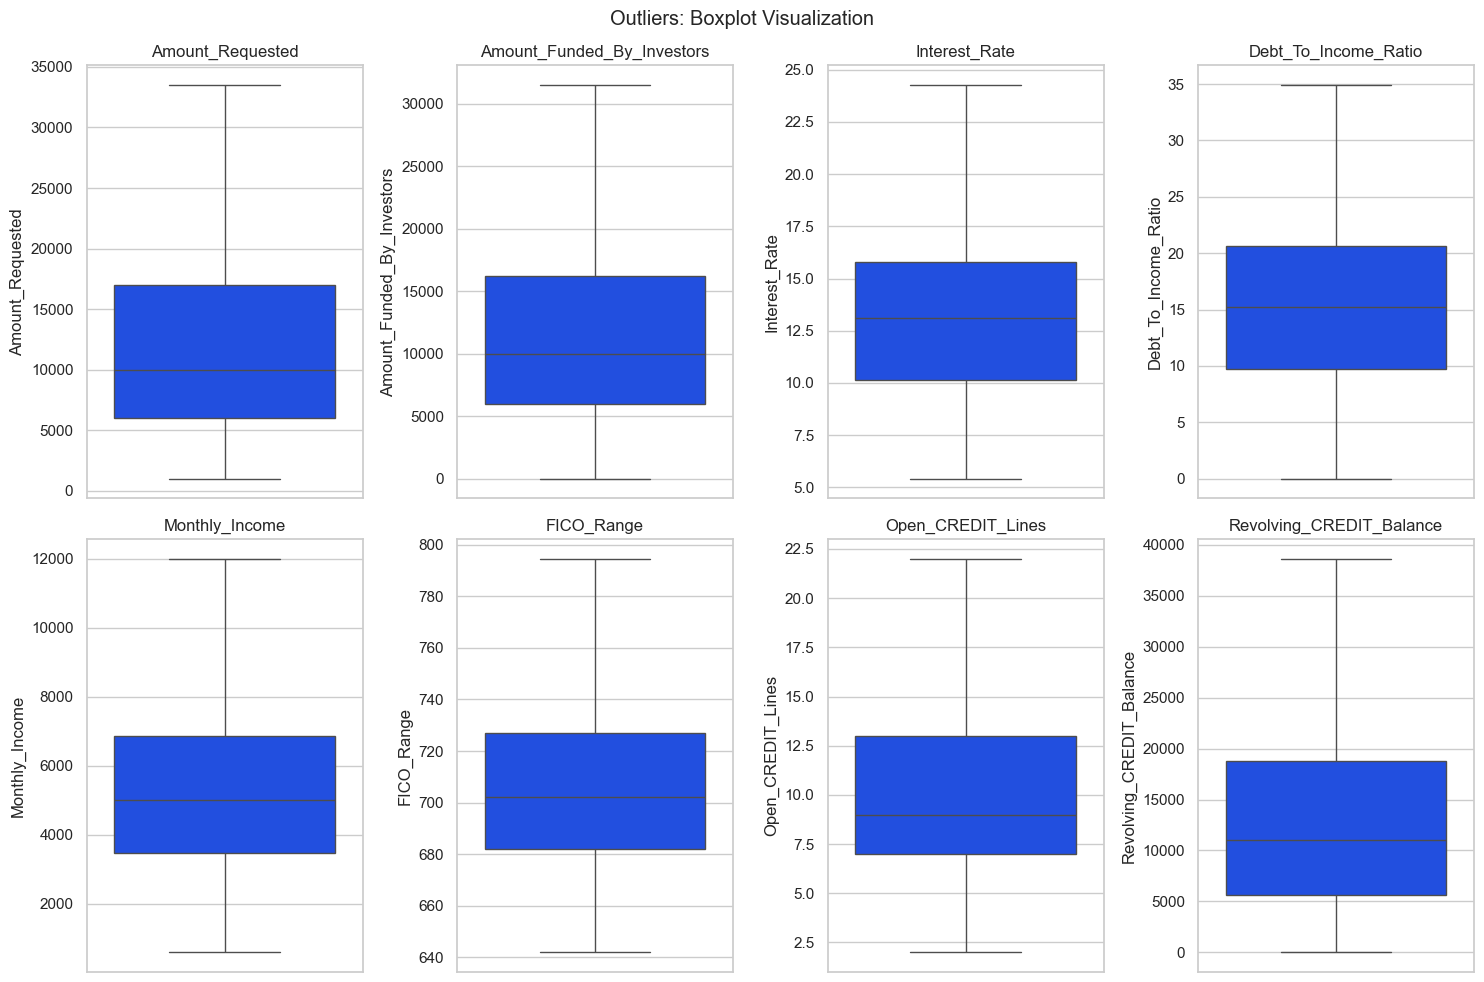

In [194]:
f,a=plt.subplots(2,4, figsize=(15,10), dpi=100)
f=f.suptitle("Outliers: Boxplot Visualization")
ind=0
for i in range(2):
    for j in range(4):
        sns.boxplot( y = num_col[ind] , data = df , ax = a[i][j] )
        a[i,j].set_title(num_col[ind])
        ind+=1
plt.tight_layout()
plt.show()

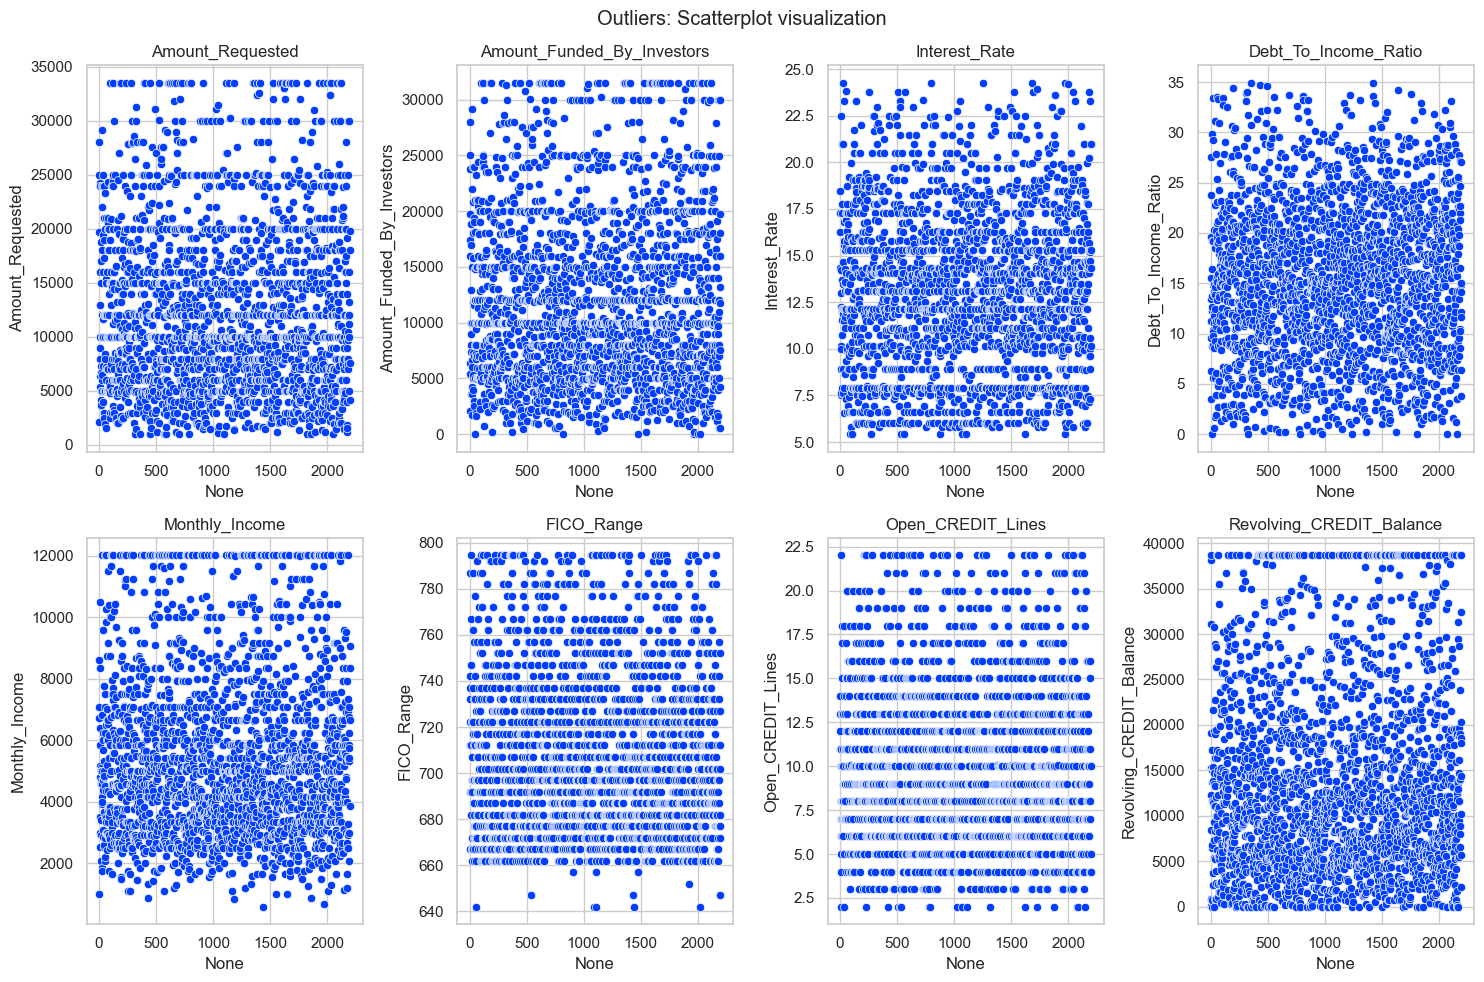

In [195]:
f,a=plt.subplots(2,4 ,figsize=(15,10),dpi=100)
f=f.suptitle("Outliers: Scatterplot visualization")
ind=0
for i in range(2):
    for j in range(4):
        sns.scatterplot( y = df[num_col[ind]] , x = df[num_col[ind]].index , ax = a[i][j] )
        a[i,j].set_title(num_col[ind])
        ind+=1
plt.tight_layout()
plt.show()

## Encoding

In [196]:
# Encoding is done for True OBJECT columns

In [197]:
for i in df.columns:
    if df[i].dtype=="object": # i returns column names, df.column_name.dtype == object
        print(i)

Loan_Purpose
Home_Ownership


In [198]:
df.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,MORTGAGE,8606.56,722.0,11.0,15210.0,3.0,5.0
1,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,MORTGAGE,6737.50,712.0,14.0,19070.0,3.0,4.0
2,2100.0,2100.00,14.33,36.0,major_purchase,3.50,OWN,1000.00,692.0,13.0,893.0,1.0,0.5
3,28000.0,28000.00,16.29,36.0,credit_card,19.62,MORTGAGE,7083.33,712.0,12.0,38194.0,1.0,11.0
4,24250.0,17431.82,12.23,60.0,credit_card,23.79,MORTGAGE,5833.33,732.0,6.0,31061.0,2.0,11.0


## One Hot Encoding

In [199]:
df = pd.get_dummies(df, columns=["Loan_Purpose","Home_Ownership"], dtype = int)

In [200]:
df.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,...,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,25000.0,25000.00,18.49,60.0,27.56,8606.56,722.0,11.0,15210.0,3.0,...,0,0,0,0,0,1,0,0,0,0
1,19750.0,19750.00,17.27,60.0,13.39,6737.50,712.0,14.0,19070.0,3.0,...,0,0,0,0,0,1,0,0,0,0
2,2100.0,2100.00,14.33,36.0,3.50,1000.00,692.0,13.0,893.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,28000.0,28000.00,16.29,36.0,19.62,7083.33,712.0,12.0,38194.0,1.0,...,0,0,0,0,0,1,0,0,0,0
4,24250.0,17431.82,12.23,60.0,23.79,5833.33,732.0,6.0,31061.0,2.0,...,0,0,0,0,0,1,0,0,0,0


In [201]:
df.dtypes

Amount_Requested                   float64
Amount_Funded_By_Investors         float64
Interest_Rate                      float64
Loan_Length                        float64
Debt_To_Income_Ratio               float64
Monthly_Income                     float64
FICO_Range                         float64
Open_CREDIT_Lines                  float64
Revolving_CREDIT_Balance           float64
Inquiries_in_the_Last_6_Months     float64
Employment_Length                  float64
Loan_Purpose_car                     int32
Loan_Purpose_credit_card             int32
Loan_Purpose_debt_consolidation      int32
Loan_Purpose_educational             int32
Loan_Purpose_home_improvement        int32
Loan_Purpose_house                   int32
Loan_Purpose_major_purchase          int32
Loan_Purpose_medical                 int32
Loan_Purpose_moving                  int32
Loan_Purpose_other                   int32
Loan_Purpose_renewable_energy        int32
Loan_Purpose_small_business          int32
Loan_Purpos

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Amount_Requested                 2200 non-null   float64
 1   Amount_Funded_By_Investors       2200 non-null   float64
 2   Interest_Rate                    2200 non-null   float64
 3   Loan_Length                      2200 non-null   float64
 4   Debt_To_Income_Ratio             2200 non-null   float64
 5   Monthly_Income                   2200 non-null   float64
 6   FICO_Range                       2200 non-null   float64
 7   Open_CREDIT_Lines                2200 non-null   float64
 8   Revolving_CREDIT_Balance         2200 non-null   float64
 9   Inquiries_in_the_Last_6_Months   2200 non-null   float64
 10  Employment_Length                2200 non-null   float64
 11  Loan_Purpose_car                 2200 non-null   int32  
 12  Loan_Purpose_credit_

## Check for duplicated values

In [203]:
df.duplicated().sum()

0

## Check the correlation

In [204]:
df.corr()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,...,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
Amount_Requested,1.000000,0.964952,0.330102,0.410448,0.073373,0.464326,0.083383,0.192424,0.403047,-0.013022,...,-0.152621,-0.036993,0.020410,-0.056442,-0.038123,0.150986,-0.020524,-0.007196,-0.043960,-0.125705
Amount_Funded_By_Investors,0.964952,1.000000,0.336097,0.402010,0.087997,0.439997,0.072221,0.183908,0.387809,-0.056953,...,-0.148521,-0.036075,0.008775,-0.052591,-0.037673,0.138121,-0.021077,-0.010006,-0.051718,-0.108318
Interest_Rate,0.330102,0.336097,1.000000,0.424446,0.177813,0.039891,-0.713259,0.084155,0.150375,0.169669,...,0.003233,-0.041271,-0.004558,-0.023542,-0.026362,-0.078718,-0.028744,0.035490,-0.021614,0.088839
Loan_Length,0.410448,0.402010,0.424446,1.000000,0.029137,0.110514,0.013517,0.043786,0.116365,0.043391,...,-0.023099,-0.019417,0.039457,-0.010962,-0.040343,0.074219,-0.011205,0.003486,-0.037729,-0.053538
Debt_To_Income_Ratio,0.073373,0.087997,0.177813,0.029137,1.000000,-0.171143,-0.222889,0.372074,0.289107,0.010953,...,-0.041137,-0.036317,-0.079403,-0.038329,-0.031136,-0.013519,-0.040769,0.003968,0.020743,0.003614
Monthly_Income,0.464326,0.439997,0.039891,0.110514,-0.171143,1.000000,0.114933,0.247806,0.413967,0.037554,...,-0.045000,-0.038217,0.007141,0.028572,-0.001714,0.260773,0.001890,0.008551,-0.093778,-0.210750
FICO_Range,0.083383,0.072221,-0.713259,0.013517,-0.222889,0.114933,1.000000,-0.094825,-0.073904,-0.090049,...,0.000773,0.041885,0.059458,0.025199,-0.013034,0.154130,0.053481,-0.036528,0.017088,-0.162863
Open_CREDIT_Lines,0.192424,0.183908,0.084155,0.043786,0.372074,0.247806,-0.094825,1.000000,0.373483,0.107968,...,-0.068190,-0.045591,-0.049841,-0.012501,-0.032131,0.151007,0.000182,0.050972,-0.028698,-0.139927
Revolving_CREDIT_Balance,0.403047,0.387809,0.150375,0.116365,0.289107,0.413967,-0.073904,0.373483,1.000000,-0.018748,...,-0.057344,-0.037075,-0.082828,-0.019577,-0.026844,0.205396,0.003566,0.042251,-0.053592,-0.180197
Inquiries_in_the_Last_6_Months,-0.013022,-0.056953,0.169669,0.043391,0.010953,0.037554,-0.090049,0.107968,-0.018748,1.000000,...,0.028852,-0.006993,0.010398,-0.017188,-0.025055,0.081299,-0.015702,-0.005158,-0.023063,-0.067709


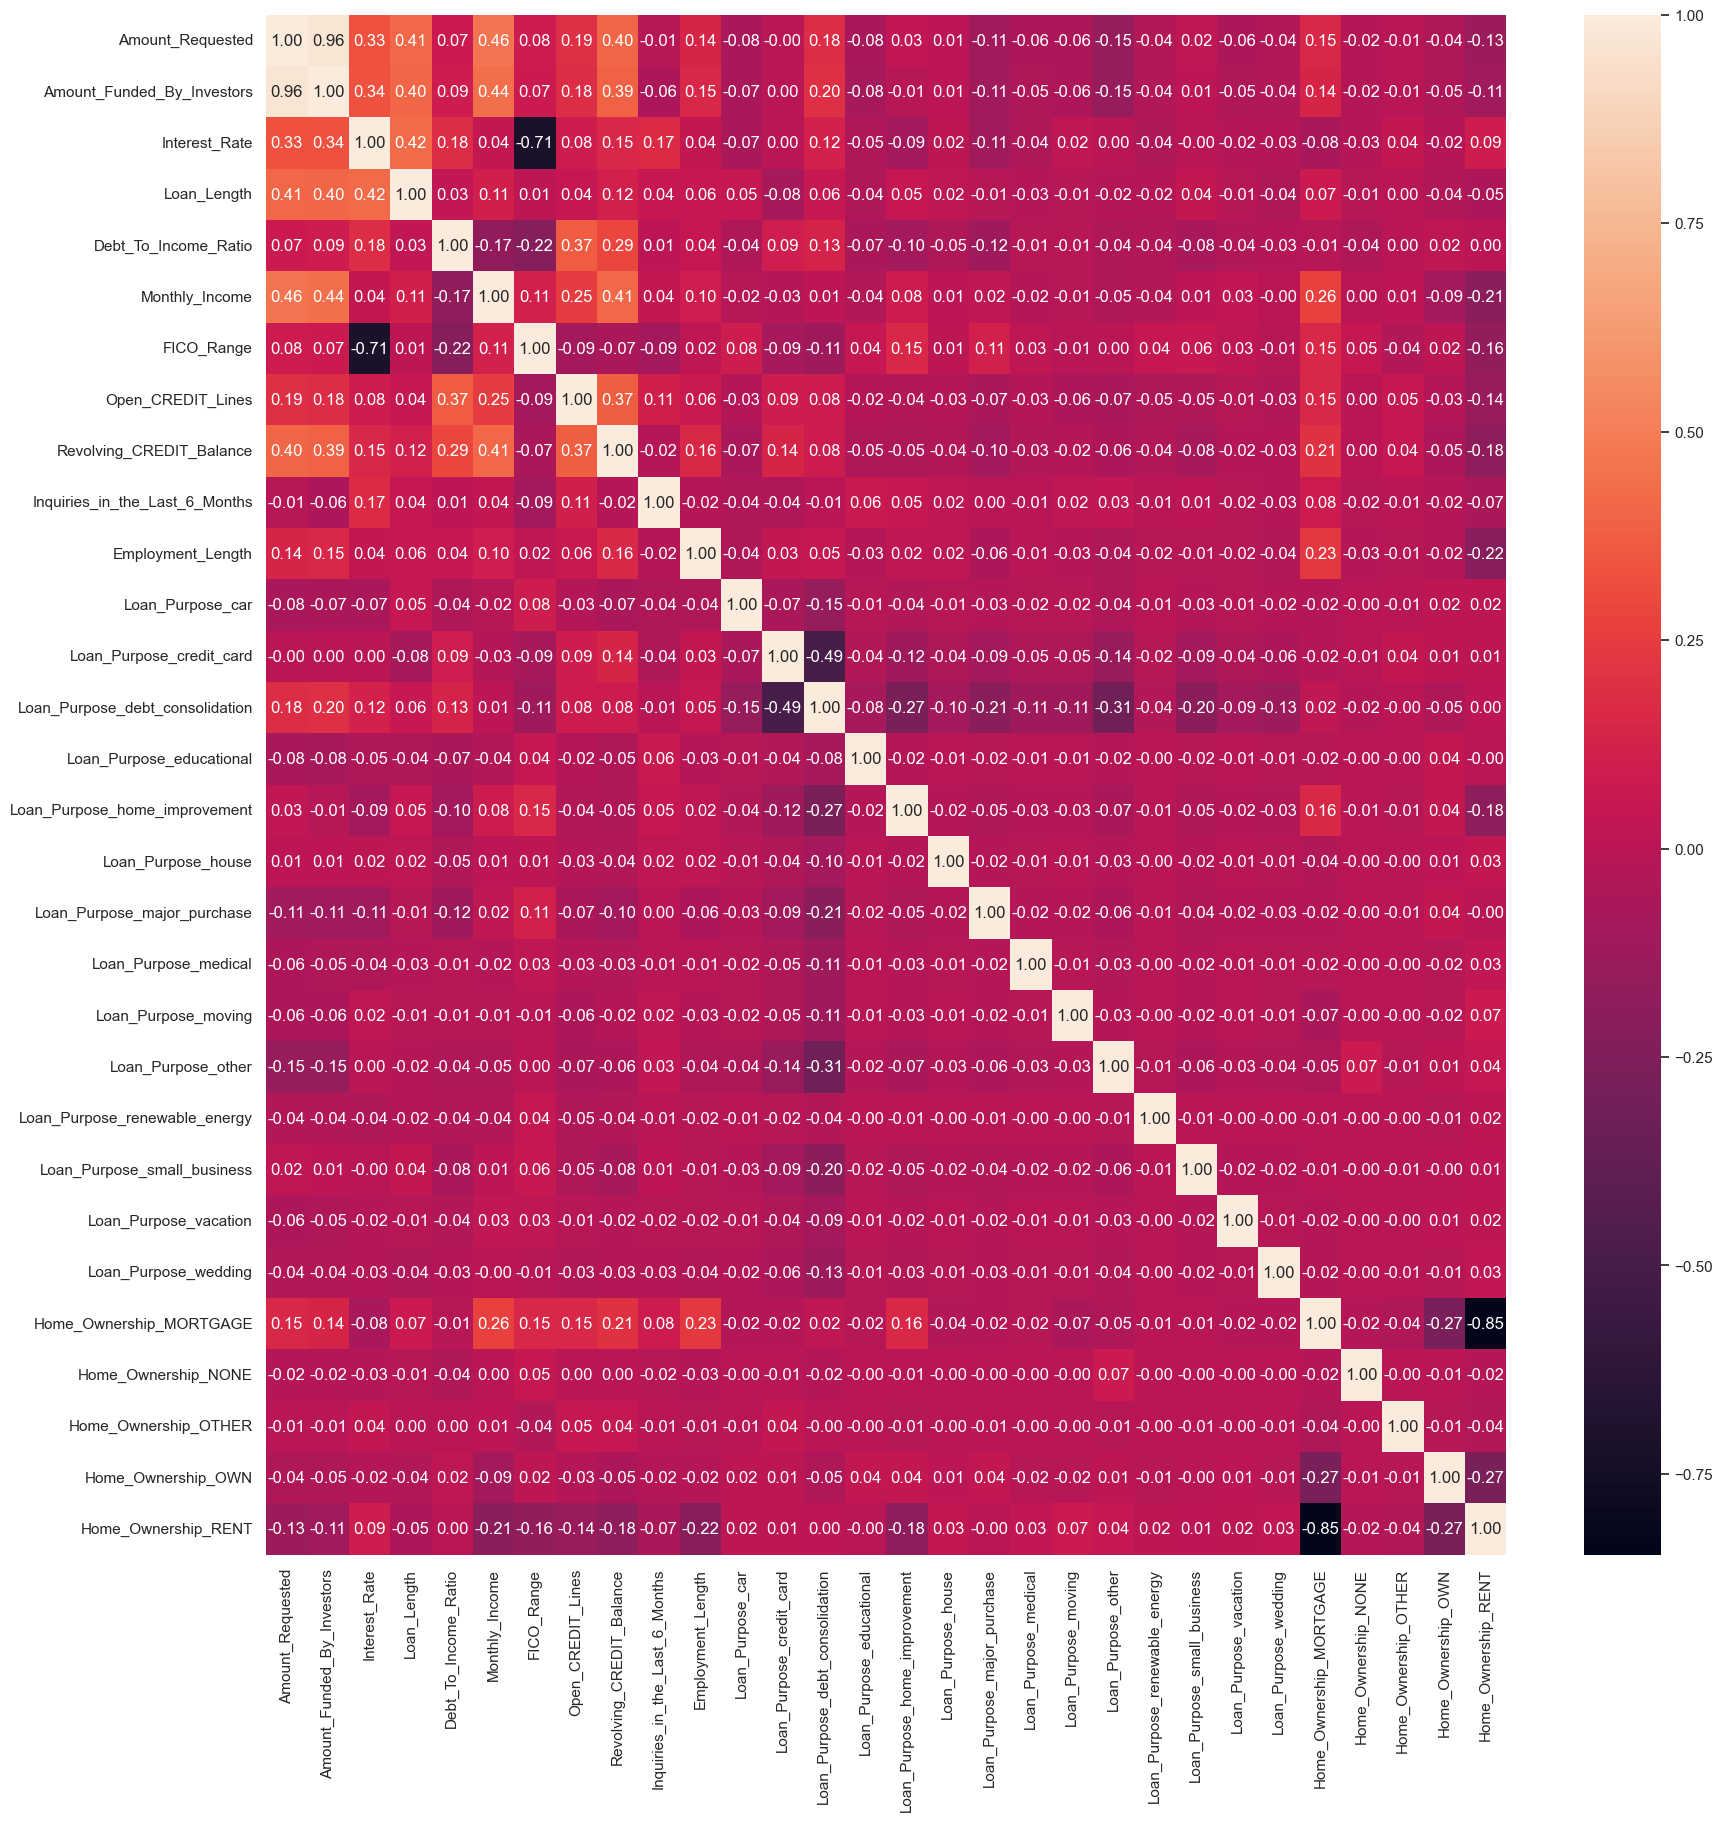

In [205]:
plt.figure(figsize= (20,20) , dpi=100)
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [206]:
# Amount_Requested and Amount_Funded_By_Investers are highly correlated columns so we can drop either of them

In [207]:
# lets drop Amount_Funded_By_Investers column

In [208]:
df.drop(columns="Amount_Funded_By_Investors",inplace=True)

In [209]:
df.head()

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,...,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_MORTGAGE,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,25000.0,18.49,60.0,27.56,8606.56,722.0,11.0,15210.0,3.0,5.0,...,0,0,0,0,0,1,0,0,0,0
1,19750.0,17.27,60.0,13.39,6737.50,712.0,14.0,19070.0,3.0,4.0,...,0,0,0,0,0,1,0,0,0,0
2,2100.0,14.33,36.0,3.50,1000.00,692.0,13.0,893.0,1.0,0.5,...,0,0,0,0,0,0,0,0,1,0
3,28000.0,16.29,36.0,19.62,7083.33,712.0,12.0,38194.0,1.0,11.0,...,0,0,0,0,0,1,0,0,0,0
4,24250.0,12.23,60.0,23.79,5833.33,732.0,6.0,31061.0,2.0,11.0,...,0,0,0,0,0,1,0,0,0,0


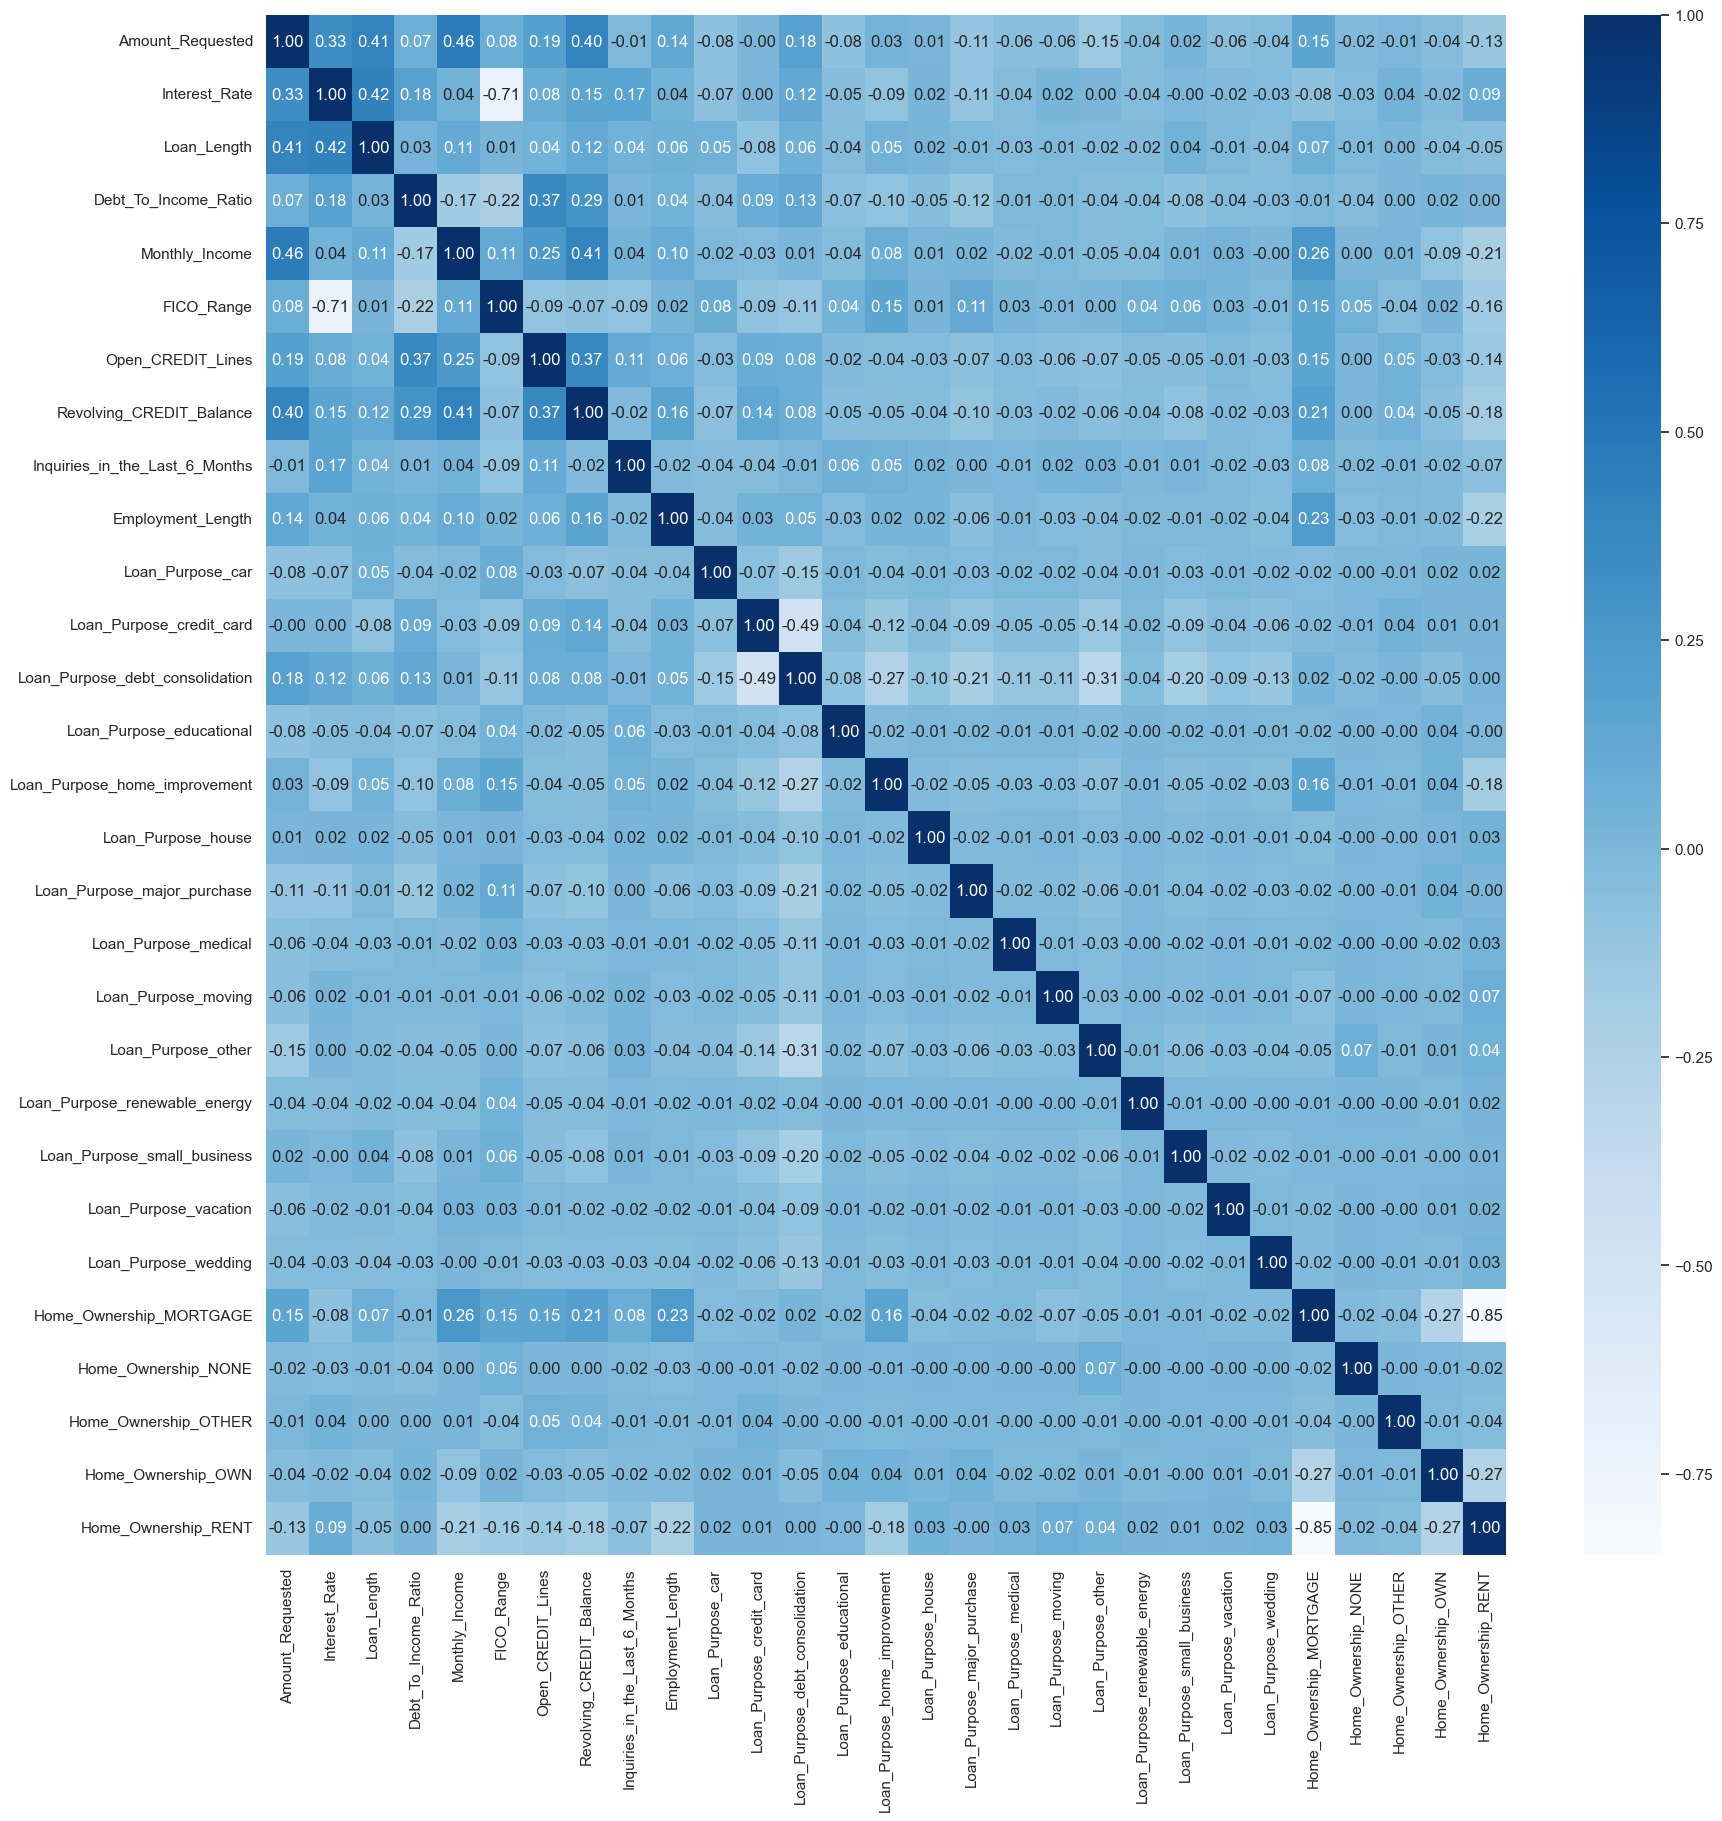

In [210]:
plt.figure(figsize=(20,20), dpi = 100)
sns.heatmap(df.corr(), cmap="Blues" , annot = True, fmt=".2f")
plt.show()